In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import collections
from collections import defaultdict
import math
from wordcloud import WordCloud

# Loading the data

In [3]:
df_tweets = pd.read_csv("C:\\Users\\USER\\Documents\\Geetha\\Data Science\\Capstone Project 1\\tweets.csv", parse_dates=True)  

In [4]:
df_tweets = df_tweets.set_index(['time','username'])
df_tweets.drop(['name'],axis = 1, inplace = True)

In [5]:
df_tweets.head(20)


,,description,location,followers,numberstatuses,tweets
time,username,,,,,
1/6/2015 21:07,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,ENGLISH TRANSLATION: 'A MESSAGE TO THE TRUTHFU...
1/6/2015 21:27,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,ENGLISH TRANSLATION: SHEIKH FATIH AL JAWLANI '...
1/6/2015 21:29,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,ENGLISH TRANSLATION: FIRST AUDIO MEETING WITH ...
1/6/2015 21:37,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,ENGLISH TRANSLATION: SHEIKH NASIR AL WUHAYSHI ...
1/6/2015 21:45,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,ENGLISH TRANSLATION: AQAP: 'RESPONSE TO SHEIKH...
1/6/2015 21:51,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,THE SECOND CLIP IN A DA'WAH SERIES BY A SOLDIE...
1/6/2015 22:04,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,ENGLISH TRANSCRIPT : OH MURABIT! : http://t.co...
1/6/2015 22:06,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,ENGLISH TRANSLATION: 'A COLLECTION OF THE WORD...
1/6/2015 22:17,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,Aslm Please share our new account after the pr...


In [6]:
df_tweets.info()


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 17410 entries, (1/6/2015 21:07, GunsandCoffee70) to (5/13/2016 16:10, ro34th)
Data columns (total 5 columns):
description       14728 non-null object
location          11432 non-null object
followers         17410 non-null int64
numberstatuses    17410 non-null int64
tweets            17410 non-null object
dtypes: int64(2), object(3)
memory usage: 842.7+ KB


#### Columns 'description' and 'location' have null values

In [7]:
df_tweets['description'] = df_tweets['description'].fillna(' ')

In [8]:
df_tweets['location'] = df_tweets['location'].fillna(' ')

#### NaNs replaced with empty string in the columns 'description' and 'location' 

In [9]:
df_tweets.head(20)

,,description,location,followers,numberstatuses,tweets
time,username,,,,,
1/6/2015 21:07,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,,640,49,ENGLISH TRANSLATION: 'A MESSAGE TO THE TRUTHFU...
1/6/2015 21:27,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,,640,49,ENGLISH TRANSLATION: SHEIKH FATIH AL JAWLANI '...
1/6/2015 21:29,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,,640,49,ENGLISH TRANSLATION: FIRST AUDIO MEETING WITH ...
1/6/2015 21:37,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,,640,49,ENGLISH TRANSLATION: SHEIKH NASIR AL WUHAYSHI ...
1/6/2015 21:45,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,,640,49,ENGLISH TRANSLATION: AQAP: 'RESPONSE TO SHEIKH...
1/6/2015 21:51,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,,640,49,THE SECOND CLIP IN A DA'WAH SERIES BY A SOLDIE...
1/6/2015 22:04,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,,640,49,ENGLISH TRANSCRIPT : OH MURABIT! : http://t.co...
1/6/2015 22:06,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,,640,49,ENGLISH TRANSLATION: 'A COLLECTION OF THE WORD...
1/6/2015 22:17,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,,640,49,Aslm Please share our new account after the pr...


In [10]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 17410 entries, (1/6/2015 21:07, GunsandCoffee70) to (5/13/2016 16:10, ro34th)
Data columns (total 5 columns):
description       17410 non-null object
location          17410 non-null object
followers         17410 non-null int64
numberstatuses    17410 non-null int64
tweets            17410 non-null object
dtypes: int64(2), object(3)
memory usage: 842.7+ KB


In [11]:
df_tweets=df_tweets.drop_duplicates()

In [12]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 17410 entries, (1/6/2015 21:07, GunsandCoffee70) to (5/13/2016 16:10, ro34th)
Data columns (total 5 columns):
description       17410 non-null object
location          17410 non-null object
followers         17410 non-null int64
numberstatuses    17410 non-null int64
tweets            17410 non-null object
dtypes: int64(2), object(3)
memory usage: 842.7+ KB


In [13]:
df_tweets.columns


Index(['description', 'location', 'followers', 'numberstatuses', 'tweets'], dtype='object')

In [14]:
df_tweets.index.get_level_values(1).value_counts(normalize=True)



Uncle_SamCoco                                                                                                                                                                                                                                                                                                       0.090752
RamiAlLolah                                                                                                                                                                                                                                                                                                         0.084721
warrnews                                                                                                                                                                                                                                                                                                            0.068409
WarReporter1                                     

#### We are analyzing the tweets of 112 different users who have generated 17410 tweets

In [15]:
df_tweets['description'] = df_tweets['description'].str.lower()
df_tweets['tweets'] = df_tweets['tweets'].str.lower()



In [16]:

def remove_punctuation(tweet):
   tweet_tokens = [re.sub (r'http\S+', 'url', x) for x in tweet]
   tweet_tokens = [re.sub (r"(!|#|\n|'|''|:|,|[0-9]|""|@\S+|/|-)", "", x) for x in tweet_tokens ]
   return tweet_tokens

tweet_tokens_split =[x.split(" ") for x in remove_punctuation(df_tweets['tweets'])]


#### Removing some of the special characters from 'tweets'column using regular expression operations

In [17]:

def singleletterword_remove(tweet):
   tweet_nosingleletterword=[]
   for word_list in tweet:
      for word in word_list[:]:
          if len(word) <= 1:
             word_list.remove(word)
      tweet_nosingleletterword.append(word_list)
   return tweet_nosingleletterword


tweet_nosingleletterword=singleletterword_remove(tweet_tokens_split)

#### Removing single character words

In [18]:

def replace_withrootword(tweet):
   list_words= ['turkey','islamicstate','syria','aleppo','warreporter1','russia', 'assad', 'iraq','url','the']
   dict_repetition=defaultdict(set)
   for item in list_words:
      for word_list in tweet:
         for word in word_list:
             if item in word:          
                 dict_repetition[item].add(word)

   for keys in dict_repetition: 
       dict_repetition[keys] = tuple(dict_repetition[keys]) 

   dict_inverse = {v: k for k, v in dict_repetition.items()} 

   tweet_replacedwithroot=[]
   for word_list in tweet:
       for i,word in enumerate(word_list):
           for key,value in dict_inverse.items():
               if word in key:
                 word_list[i]=value
       tweet_replacedwithroot.append(word_list)
   return tweet_replacedwithroot

tweet_replacedwithroot=replace_withrootword(tweet_nosingleletterword)


#### Creating a dictionary for words with same root and replacing the words in the 'tweets' column with their root

In [19]:
def tf_idf(tweet):
   tf = defaultdict(int)
   for word_list in tweet:
      for word in set(word_list):     
             tf[word]+=1             
   idf = defaultdict(int)
   count_tweets= df_tweets.tweets.count()
   for key, value in tf.items():
       idf[key]=math.log(count_tweets/(value + 1))
   
   return sorted(idf.items(), key=lambda x: x[1],reverse=False)
tf_idf(tweet_replacedwithroot)


[('url', 0.6638281978414171),
 ('the', 0.826399626289225),
 ('rt', 1.0931704880415782),
 ('in', 1.1330289366385622),
 ('of', 1.2898882336026034),
 ('to', 1.5934831580425042),
 ('and', 1.7527817936031735),
 ('is', 1.786831939633686),
 ('syria', 2.130462797133915),
 ('isis', 2.1460576550918216),
 ('on', 2.3508297425717903),
 ('by', 2.3857919051339302),
 ('for', 2.530622853012386),
 ('with', 2.596990848445791),
 ('from', 2.6492179065777814),
 ('killed', 2.671395406893468),
 ('&amp;', 2.6856156381525667),
 ('iraq', 2.693226668550703),
 ('are', 2.742823609690075),
 ('you', 2.842156141286347),
 ('that', 2.929615446614933),
 ('this', 2.9579706723700583),
 ('assad', 3.0207408464508876),
 ('army', 3.0242806731560115),
 ('it', 3.140734804962341),
 ('us', 3.1608562081617624),
 ('not', 3.17862837790756),
 ('have', 3.196722121350259),
 ('was', 3.206602229949966),
 ('russia', 3.2427072345920824),
 ('aleppo', 3.2680250425763724),
 ('after', 3.2924537382613344),
 ('who', 3.3096014694221125),
 ('an', 3

#### Finding the low IDF(Inverse Document Frequency ) terms to add them to the list of stop words

In [20]:
stop_words=['url','the', 'in', 'of', 'to', 'and', 'is', 'on', 'by', 'for', 'with', '&amp;', 'from', 'are', 'killed', 'you', 'they', 'that', 'this', 'it', 'us', 'was', 'have', 'their', 'will', 'an', 'who', 'be', 'as', 'after', 'at', 'he', 'al', 'but', 'its', 'has', 'his', 'one', 'were', 'if', 'all', 'today', 'them', 'we', 'city', 'people', 'about', 'your', 'now', 'when', 'ypg', 'what', 'more', 'or', 'new', 'over', 'like', 'just', 'so', 'can', 'de', 'west', 'north', 'saa','how', 'only', 'do', 'claims', 'reports', 'those', 'captured', 'fsa', 'than', 'my', 'back', 'up', 'la', 'between', 'group', 'our', 'there', 'out', 'two', 'area', 'while', 'via', 'which', 'know', 'because', 'been','see', 'le', 'coalition', 'me', 'village', 'south', 'northern', 'news', 'many', 'him', 'east', 'time', 'being', 'some', 'still', 'these', 'think', 'support', 'then', 'may', 'a', 'why', 'make', 'air','take', 'also', 'want', 'huge', 'says', 'even', 'un', 'under', 'during', 'other', 'very', 'homs','say', 'les', 'targeted', 'help', 'into','days', 'reportedly', 'eastern', 'any','said','please', 'des', 'where', 'would', 'first', 'yesterday', 'get', 'ied', 'heavy', 'report', 'day', 'security', 'same', 'twitter','im', 'ahrar', 'least', 'htt…', 'years', 'cest', 'deir','je', 'vso','rt', 'url', 'the', 'in', 'of', 'to', 'and', 'is', '', 'on', 'by', 'for', '&amp;', 'with', 'from', 'you', 'are', 'they', 'this', 'that', 'it', 'was', 'have', 'who', 'after', 'their', 'will', 'as', 'an', 'be', 'he', 'near', 'its', 'at', 'but', 'them', 'has', 
'if', 'were', 'his', 'al', 'english', 'translation', 'today', 'one', 'when', 'people', 'or', 'city', 'what', 'we', 'now', 'so', 'all', 'more', 'only','about', 'your', 'ypg', 'de', 'new', 'reports', 'just', 'over', 'saa', 'like', 'my', 'do', 'i', 'can', 'area', 'there','up', 'between', 'how', 'our', 'than', 'claims', 'group', 'out', 'may', 'la', 'huge', 'those', 'me', 'some', 'le', 'time', 'see', 'been', 'know', 'make', 'many', 'him', 'still', 'which', 'why', 'clashes', 'says', 'two', 'south', 'because', 'via', 'these', 'support', 'being', 'then', 'un', 'other', 'said', 'control', 'back', 'under', 'very', 'where', 'while', 'any', 'say', 'even', 'air', 'lol', 'during', 'eastern', 'get', 'days', 'want', 'please', 'also', 'most','first', 'im', 'into', 'another', 'les', 'would', 'positions', 'reportedly']

stop_words = list(set(stop_words))



#### Finding the most frequent words in 'tweets' column inorder to create a list of stop words

In [21]:
#print(single_word_remove(tweet_tokens_split))
def remove_stopwords(stopword,tweet): 
    tweet_nostopwords=[]
    for word_list in tweet:
        
         #print(word_list)
        word_list=list(set(word_list))
         #print(word_list)
        for word in stopword:
             if word in word_list:          
               word_list.remove(word)
        tweet_nostopwords.append(word_list)
    return tweet_nostopwords
tweet_nostopwords=remove_stopwords(stop_words,tweet_replacedwithroot)
tweet_nostopwords

[['sheikh', 'truthful', 'maqdisi', 'syria', 'abu', 'muhammed', 'message'],
 ['jawlani', 'easy', 'fatih', 'sacrifice', 'sheikh', 'integrity'],
 ['audio', 'jawlani', '(ha)', 'fatih', 'meeting', 'sheikh'],
 ['(ha)',
  'leader',
  'nasir',
  'sheikh',
  'aqap',
  'wuhayshi',
  'victory',
  'promise'],
 ['although',
  'sheikh',
  'baghdadis',
  'dislike',
  'aqap',
  'disbelievers',
  'it.',
  'statement',
  'response'],
 ['clip', 'second', 'soldier', 'dawah', 'video', 'series', 'jn', 'link'],
 ['oh', 'transcript', 'murabit'],
 ['collection', 'words', 'regarding', 'dawlah', 'ulama'],
 ['suspended.', 'account', 'aslm', 'share', 'previous'],
 ['regarding', 'aqap', 'raid', 'blessed', 'statement'],
 [],
 ['france',
  'taken',
  'regarding',
  'blessed',
  'previous',
  'brightened',
  'link',
  'attack',
  'faces'],
 ['nabi',
  '(ha)',
  'hasan',
  'mujahideen',
  'sheikh',
  'advice',
  'abu',
  's.a.w',
  'kuwaiti'],
 ['nabi',
  '(ha)',
  'mujahideen',
  'saw',
  'sheikh',
  'advice',
  'abu'

#### Removing stopwords from the list of words in 'tweets' column

In [22]:
tweet_tokens_joined =[' '.join(words) for words in tweet_nostopwords]
tweet_tokens_joined

['sheikh truthful maqdisi syria abu muhammed message',
 'jawlani easy fatih sacrifice sheikh integrity',
 'audio jawlani (ha) fatih meeting sheikh',
 '(ha) leader nasir sheikh aqap wuhayshi victory promise',
 'although sheikh baghdadis dislike aqap disbelievers it. statement response',
 'clip second soldier dawah video series jn link',
 'oh transcript murabit',
 'collection words regarding dawlah ulama',
 'suspended. account aslm share previous',
 'regarding aqap raid blessed statement',
 '',
 'france taken regarding blessed previous brightened link attack faces',
 'nabi (ha) hasan mujahideen sheikh advice abu s.a.w kuwaiti',
 'nabi (ha) mujahideen saw sheikh advice abu kuwaiti hassan',
 'not translating',
 'nobody aslm anybody video? translate else translating jn',
 'knw inshallah available let anybody translate subs',
 'half inshallah busy. few through way',
 'aslm exception completed few',
 'words syria tomorrow completed',
 'not? should finish inshallah.',
 'links salvation path su

In [23]:
tf_idf(tweet_nostopwords)

[('syria', 2.130462797133915),
 ('isis', 2.1460576550918216),
 ('iraq', 2.693226668550703),
 ('assad', 3.0207408464508876),
 ('army', 3.0242806731560115),
 ('not', 3.17862837790756),
 ('russia', 3.2427072345920824),
 ('aleppo', 3.2680250425763724),
 ('islamic', 3.3302535139747818),
 ('state', 3.3846774958624697),
 ('against', 3.444031738511652),
 ('allah', 3.572437543287363),
 ('soldiers', 3.582715126045603),
 ('attack', 3.6163317368445878),
 ('forces', 3.6803006196870633),
 ('islamicstate', 3.6848668376666445),
 ('breaking', 3.7986532936385426),
 ('turkey', 3.867646165125494),
 ('fighters', 3.932917555478718),
 ('abu', 3.9902484872178263),
 ('regime', 4.025007120583001),
 ('video', 4.03470024978866),
 ('no', 4.051067227252865),
 ('rebels', 4.054373015387365),
 ('muslims', 4.1264453634284886),
 ('usa', 4.130010429592986),
 ('dont', 4.137178919071598),
 ('amaqagency', 4.204118401746707),
 ('airstrikes', 4.223536487603809),
 ('palmyra', 4.2353709452508115),
 ('breakingnews', 4.2717385894

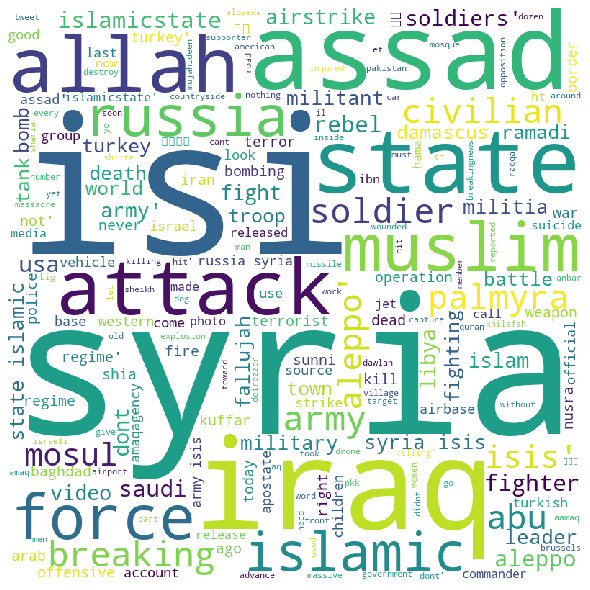

In [25]:

def wordcloud_tweets(tweet):
   wordcloud = WordCloud(width = 800, height = 800, 
                   background_color ='white',                 
                   min_font_size = 10).generate(str(tweet))               
   plt.figure(figsize = (8, 8), facecolor = None) 
   plt.imshow(wordcloud) 
   plt.axis("off") 
   plt.tight_layout(pad = 0)   
   plt.show() 
    
wordcloud_tweets(tweet_tokens_joined)   
    

In [ ]:
df_tweet_resetindex=df_tweets.reset_index(level='username')
#print(df_tweet_resetindex.groupby('username').count())
dict_username=df_tweet_resetindex['username'].value_counts()[df_tweet_resetindex['username'].value_counts()>200].to_dict()
df_username = pd.Series(dict_username)
plt.bar(range(len(df_username)), df_username.values)
plt.xticks(range(len(df_username)), df_username.index.values)

plt.xticks(rotation=45)
plt.show()

'''
import seaborn as sns
ax = sns.countplot(x="username",data=df_username )
ax.xticks(range(len(df_username)), df_username.index.values)
'''


